In [3]:
import numpy as np
from sklearn.datasets import fetch_mldata
import pandas as pd
%matplotlib notebook

In [4]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [5]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: ', df.shape)

Size of the dataframe:  (70000, 785)


In [7]:
rndperm = np.random.permutation(df.shape[0])

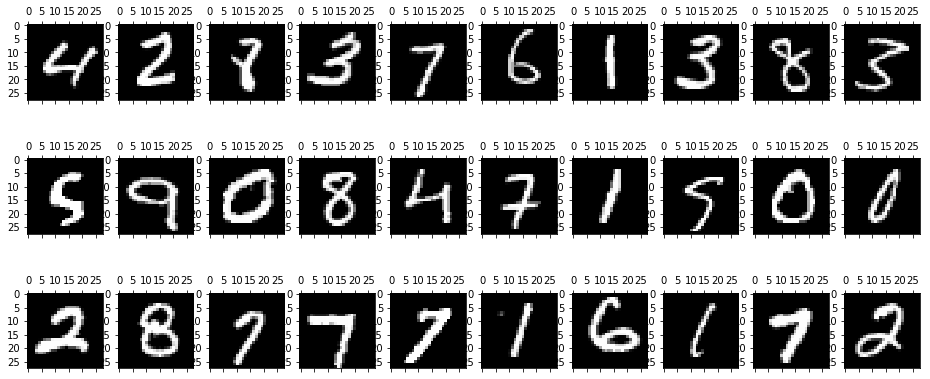

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [9]:
import time
from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: ', format(time.time()-time_start), ' seconds')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.480s...
[t-SNE] Computed neighbors for 7000 samples in 37.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.211885
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.957649
[t-SNE] Error after 300 iterations: 2.433033
t-SNE done! Time elapsed:  99.57645988464355  seconds


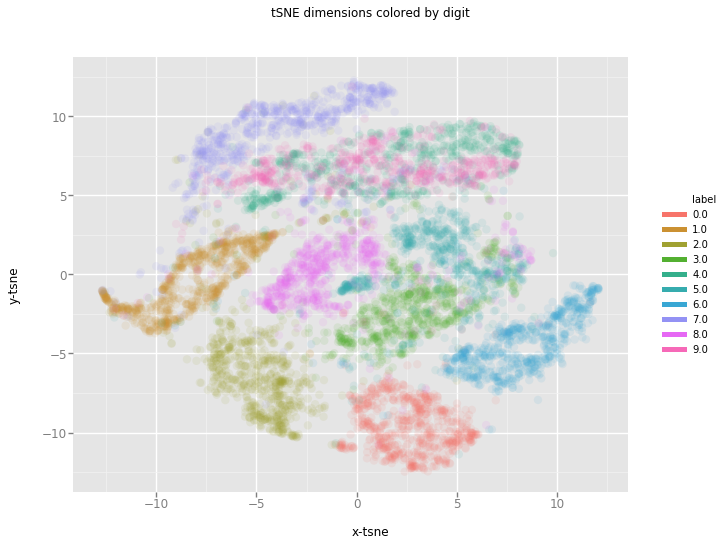

<ggplot: (309975921)>

In [12]:
from ggplot import *
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [14]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

print('Explained variation per principal component (PCA): ',format(np.sum(pca_50.explained_variance_ratio_)))

Explained variation per principal component (PCA):  0.8253840425128162


In [15]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {}',format(time.time()-time_start), ' seconds')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 7.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.831278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.182289
[t-SNE] Error after 300 iterations: 2.768546
t-SNE done! Time elapsed: {} 101.

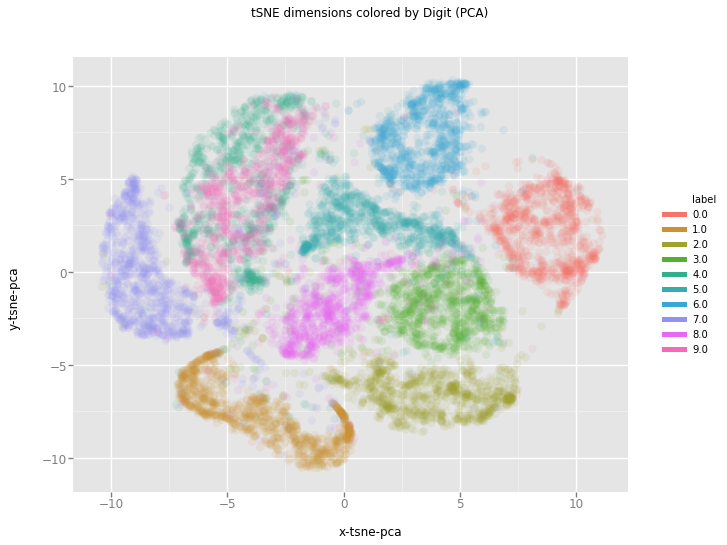

<ggplot: (-9223372036544564315)>

In [16]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart